<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats 
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [6]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [7]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [9]:
boston_df.tail(10)


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
496,496,0.28960,0.0,9.69,0.0,0.585,5.390,72.9,2.7986,6.0,391.0,19.2,21.14,19.7
497,497,0.26838,0.0,9.69,0.0,0.585,5.794,70.6,2.8927,6.0,391.0,19.2,14.10,18.3
498,498,0.23912,0.0,9.69,0.0,0.585,6.019,65.3,2.4091,6.0,391.0,19.2,12.92,21.2
499,499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6.0,391.0,19.2,15.10,17.5
500,500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6.0,391.0,19.2,14.33,16.8
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0
505,505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,7.88,11.9


CHAS=0.0: Mean=22.09, Std=8.83, Count=471
CHAS=1.0: Mean=28.44, Std=11.82, Count=35
T-statistic: 4.00, P-value: 0.0001


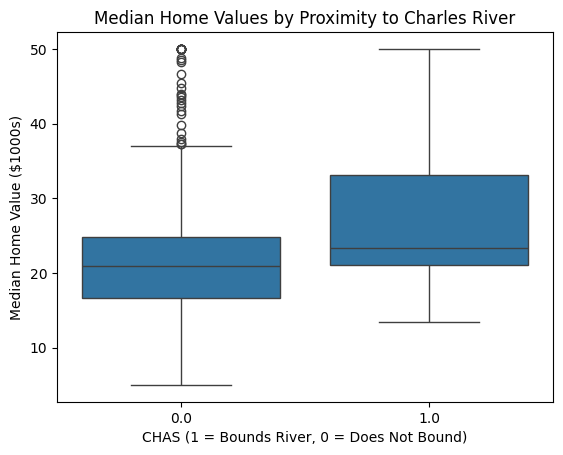

In [13]:

df=boston_df
chas_groups = df.groupby('CHAS')['MEDV']
for chas, values in chas_groups:
    print(f"CHAS={chas}: Mean={values.mean():.2f}, Std={values.std():.2f}, Count={values.count()}")

# T-test
chas_1 = df[df['CHAS'] == 1]['MEDV']
chas_0 = df[df['CHAS'] == 0]['MEDV']
t_stat, p_value = scipy.stats.ttest_ind(chas_1, chas_0)
print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.4f}")

# Boxplot
sns.boxplot(x='CHAS', y='MEDV', data=df)
pyplot.title("Median Home Values by Proximity to Charles River")
pyplot.xlabel("CHAS (1 = Bounds River, 0 = Does Not Bound)")
pyplot.ylabel("Median Home Value ($1000s)")
pyplot.show()

<ipython-input-14-9bbe32cdc54c>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_groups = df.groupby('AGE_group')['MEDV']


AGE Group 0-25%: Mean=27.65, Std=7.06, Count=49
AGE Group 25-50%: Mean=26.22, Std=7.43, Count=98
AGE Group 50-75%: Mean=24.71, Std=7.55, Count=97
AGE Group 75-100%: Mean=19.39, Std=9.56, Count=262


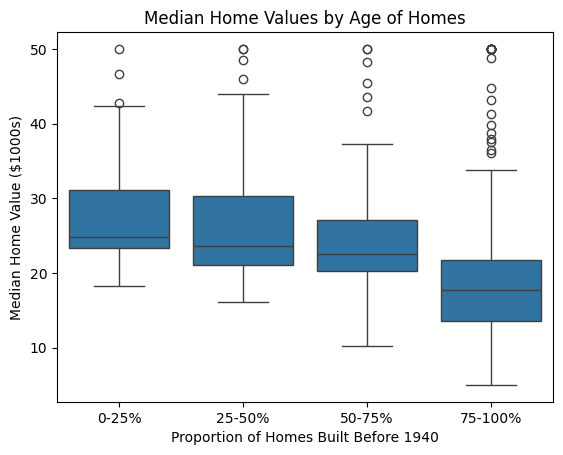

In [14]:
df['AGE_group'] = pd.cut(df['AGE'], bins=[0, 25, 50, 75, 100], labels=['0-25%', '25-50%', '50-75%', '75-100%'])

# Statistiche descrittive
age_groups = df.groupby('AGE_group')['MEDV']
for group, values in age_groups:
    print(f"AGE Group {group}: Mean={values.mean():.2f}, Std={values.std():.2f}, Count={values.count()}")

# Boxplot
sns.boxplot(x='AGE_group', y='MEDV', data=df)
pyplot.title("Median Home Values by Age of Homes")
pyplot.xlabel("Proportion of Homes Built Before 1940")
pyplot.ylabel("Median Home Value ($1000s)")
pyplot.show()

Correlation coefficient: 0.76, P-value: 0.0000


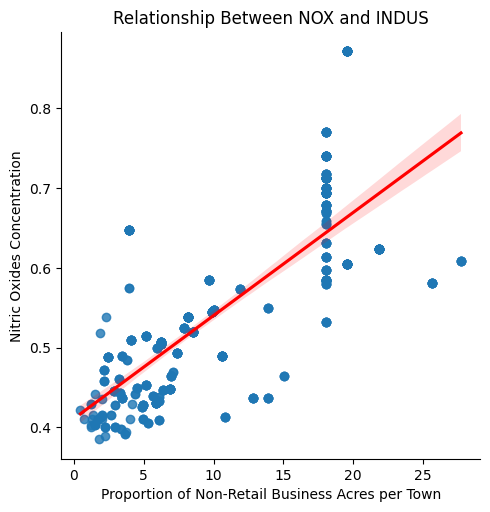

In [15]:
# Correlazione di Pearson
correlation, p_value = scipy.stats.pearsonr(df['NOX'], df['INDUS'])
print(f"Correlation coefficient: {correlation:.2f}, P-value: {p_value:.4f}")

# Scatterplot con regressione
sns.lmplot(x='INDUS', y='NOX', data=df, line_kws={'color': 'red'})
pyplot.title("Relationship Between NOX and INDUS")
pyplot.xlabel("Proportion of Non-Retail Business Acres per Town")
pyplot.ylabel("Nitric Oxides Concentration")
pyplot.show()

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 19 Jan 2025   Prob (F-statistic):           1.21e-08
Time:                        10:42:32   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.3901      0.817     22.499      0.0

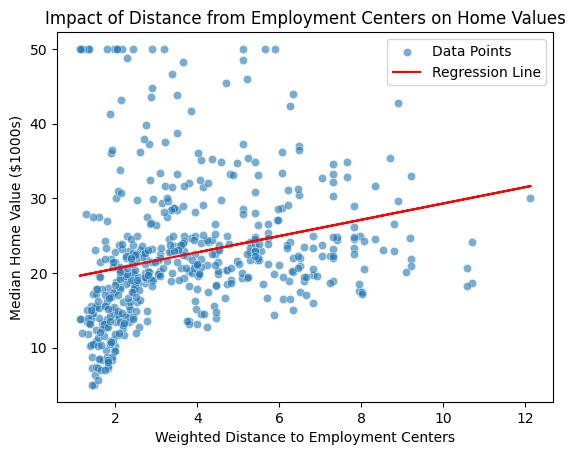

In [17]:
# Regressione lineare con statsmodels
model = ols('MEDV ~ DIS', data=df).fit()
print(model.summary())

# Scatterplot con linea di regressione
sns.scatterplot(x='DIS', y='MEDV', data=df, alpha=0.6, label='Data Points')
pyplot.plot(df['DIS'], model.predict(df[['DIS']]), color='red', label='Regression Line')
pyplot.title("Impact of Distance from Employment Centers on Home Values")
pyplot.xlabel("Weighted Distance to Employment Centers")
pyplot.ylabel("Median Home Value ($1000s)")
pyplot.legend()
pyplot.show()
